In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, detrend


In [13]:
df=pd.read_csv("Downloads/final - Copy.csv")
df['Date'] = pd.to_datetime(df['Date'], format='mixed') #changing data type
df['Time'] = pd.to_datetime(df['Time'], format='mixed') #changing data type
print(df.dtypes) #checking data types

Date              datetime64[ns]
Time              datetime64[ns]
Temperature(C)           float64
Humidity(%)                int64
pH                       float64
dtype: object


          Date                Time  Temperature(C)  Humidity(%)    pH
0   2024-11-15 2024-12-16 14:34:38            32.7           61  0.00
1   2024-11-15 2024-12-16 14:34:44            32.7           61  0.00
2   2024-11-15 2024-12-16 14:34:48            32.7           60  0.00
3   2024-11-15 2024-12-16 14:34:53            32.7           60  0.00
4   2024-11-15 2024-12-16 14:34:58            32.7           60  0.00
..         ...                 ...             ...          ...   ...
360 2024-11-15 2024-12-16 20:05:34            32.1           71  2.56
361 2024-11-15 2024-12-16 20:05:39            32.1           71  2.56
362 2024-11-15 2024-12-16 20:20:33            32.0           71  2.56
363 2024-11-15 2024-12-16 20:35:33            31.9           71  2.56
364 2024-11-15 2024-12-16 20:35:39            31.9           71  2.56

[365 rows x 5 columns]

Daily Average for 2024-11-15:
Temperature(C)    32.719726
Humidity(%)       62.389041
pH                 9.212164
dtype: float64
Domina

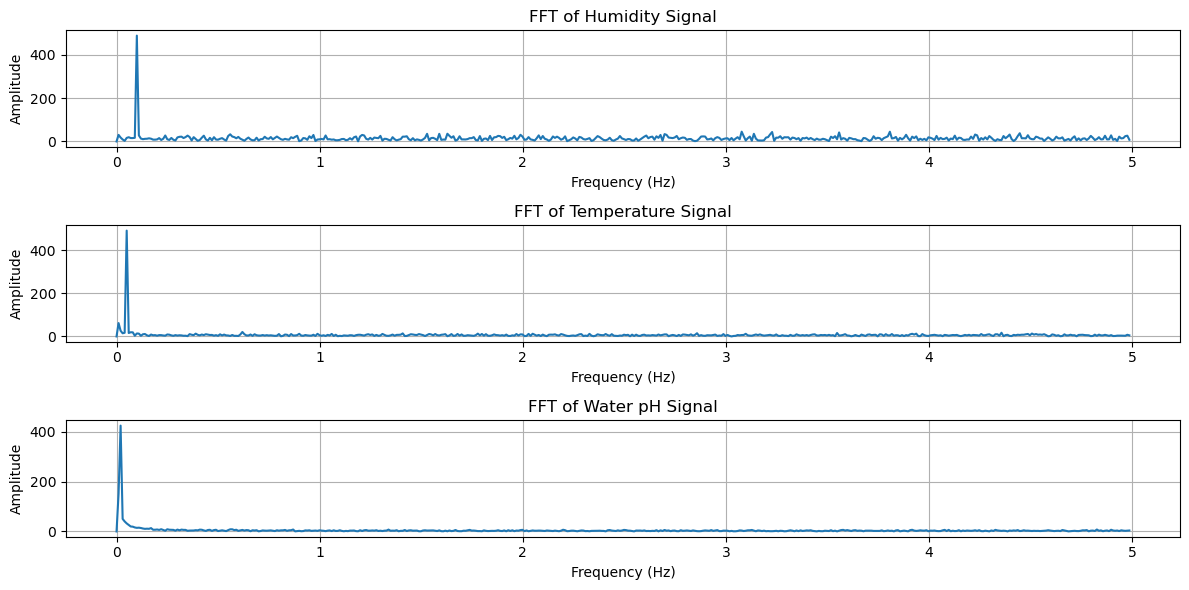

In [61]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

filtered_df = df[df['Date'] == pd.Timestamp('2024-11-15')] #2024/11/15
mean_values = filtered_df[['Temperature(C)', 'Humidity(%)', 'pH']].mean() #average values for temperature, humidity, pH

print(filtered_df)
print("\nDaily Average for 2024-11-15:")
print(mean_values)

time = np.linspace(0, 100, 1000)  # 1000 time points, evenly spaced
Fs = 1 / (time[1] - time[0])  # Sampling frequency (1 Hz here)

# Simulated signals
humidity_signal = np.sin(2 * np.pi * 0.1 * time) + 0.5 * np.random.normal(size=len(time))  # Humidity signal
temperature_signal = np.sin(2 * np.pi * 0.05 * time) + 0.2 * np.random.normal(size=len(time))  # Temperature signal
ph_signal = np.sin(2 * np.pi * 0.02 * time) + 0.1 * np.random.normal(size=len(time))  # Water pH signal

# Step 1: Detrend signals
humidity_signal_detrended = detrend(humidity_signal)
temperature_signal_detrended = detrend(temperature_signal)
ph_signal_detrended = detrend(ph_signal)

# Step 2: Apply FFT to signals
N = len(time)  # Number of samples
frequencies = np.fft.fftfreq(N, d=1/Fs)  # Frequency bins
positive_freqs = frequencies[:N // 2]  # Keep only positive frequencies

# FFT values (magnitude)
humidity_fft = np.abs(np.fft.fft(humidity_signal_detrended)[:N // 2])
temperature_fft = np.abs(np.fft.fft(temperature_signal_detrended)[:N // 2])
ph_fft = np.abs(np.fft.fft(ph_signal_detrended)[:N // 2])

# Step 3: Find dominant frequencies and amplitudes
dominant_freq_humidity = positive_freqs[np.argmax(humidity_fft)]
dominant_amplitude_humidity = np.max(humidity_fft)
print(f"Dominant frequency for humidity: {dominant_freq_humidity:.3f} Hz, Amplitude: {dominant_amplitude_humidity:.3f}")

dominant_freq_temperature = positive_freqs[np.argmax(temperature_fft)]
dominant_amplitude_temperature = np.max(temperature_fft)
print(f"Dominant frequency for temperature: {dominant_freq_temperature:.3f} Hz, Amplitude: {dominant_amplitude_temperature:.3f}")

dominant_freq_ph = positive_freqs[np.argmax(ph_fft)]
dominant_amplitude_ph = np.max(ph_fft)
print(f"Dominant frequency for pH: {dominant_freq_ph:.3f} Hz, Amplitude: {dominant_amplitude_ph:.3f}")

# Step 4: Plot FFTs for visualization
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(positive_freqs, humidity_fft)
plt.title("FFT of Humidity Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(positive_freqs, temperature_fft)
plt.title("FFT of Temperature Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(positive_freqs, ph_fft)
plt.title("FFT of Water pH Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

          Date                Time  Temperature(C)  Humidity(%)    pH
365 2024-11-16 2024-12-16 05:58:01            29.3           79  2.56
366 2024-11-16 2024-12-16 06:13:01            29.3           79  2.56
367 2024-11-16 2024-12-16 06:13:06            29.3           79  2.56
368 2024-11-16 2024-12-16 06:28:01            29.4           78  2.56
369 2024-11-16 2024-12-16 06:43:01            29.4           78  2.56
..         ...                 ...             ...          ...   ...
468 2024-11-16 2024-12-16 23:13:05            30.9           70  2.56
469 2024-11-16 2024-12-16 23:28:00            30.9           71  2.56
470 2024-11-16 2024-12-16 23:43:01            30.9           72  2.56
471 2024-11-16 2024-12-16 23:43:05            30.9           72  2.56
472 2024-11-16 2024-12-16 23:58:01            30.8           73  2.56

[108 rows x 5 columns]

Daily Average for 2024-11-16:
Temperature(C)    30.975000
Humidity(%)       70.416667
pH                 2.560000
dtype: float64
Domina

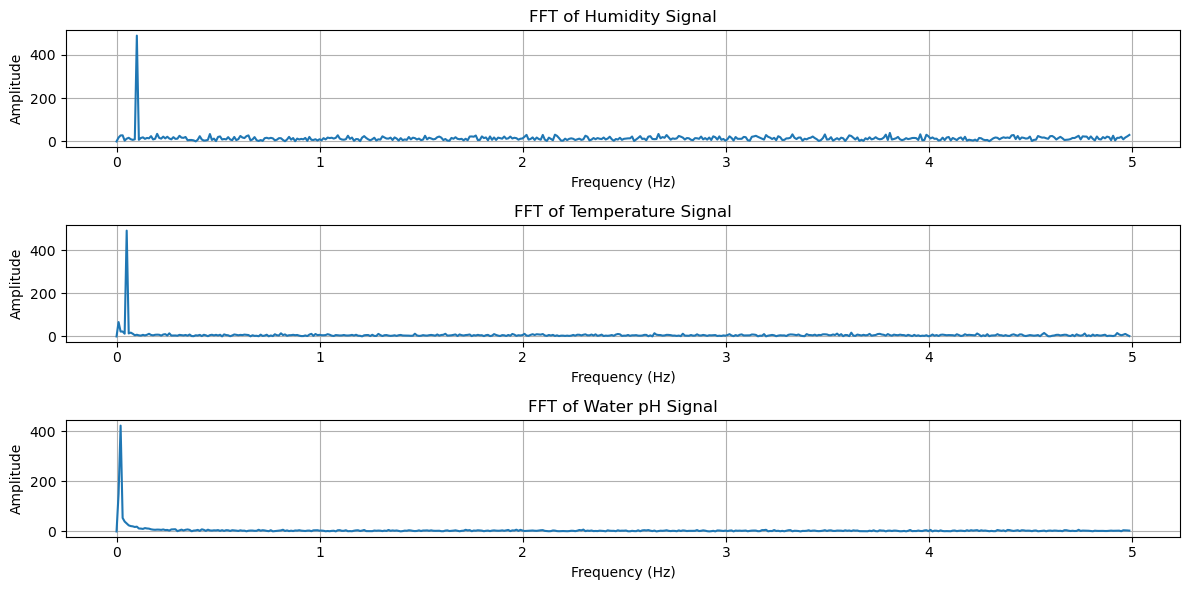

In [71]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

filtered_df = df[df['Date'] == pd.Timestamp('2024-11-16')] #2024/11/16
mean_values = filtered_df[['Temperature(C)', 'Humidity(%)', 'pH']].mean() #average values for temperature, humidity, pH

print(filtered_df)
print("\nDaily Average for 2024-11-16:")
print(mean_values)


time = np.linspace(0, 100, 1000)  # 1000 time points, evenly spaced
Fs = 1 / (time[1] - time[0])  # Sampling frequency (1 Hz here)

# Simulated signals
humidity_signal = np.sin(2 * np.pi * 0.1 * time) + 0.5 * np.random.normal(size=len(time))  # Humidity signal
temperature_signal = np.sin(2 * np.pi * 0.05 * time) + 0.2 * np.random.normal(size=len(time))  # Temperature signal
ph_signal = np.sin(2 * np.pi * 0.02 * time) + 0.1 * np.random.normal(size=len(time))  # Water pH signal

# Step 1: Detrend signals
humidity_signal_detrended = detrend(humidity_signal)
temperature_signal_detrended = detrend(temperature_signal)
ph_signal_detrended = detrend(ph_signal)

# Step 2: Apply FFT to signals
N = len(time)  # Number of samples
frequencies = np.fft.fftfreq(N, d=1/Fs)  # Frequency bins
positive_freqs = frequencies[:N // 2]  # Keep only positive frequencies

# FFT values (magnitude)
humidity_fft = np.abs(np.fft.fft(humidity_signal_detrended)[:N // 2])
temperature_fft = np.abs(np.fft.fft(temperature_signal_detrended)[:N // 2])
ph_fft = np.abs(np.fft.fft(ph_signal_detrended)[:N // 2])

# Step 3: Find dominant frequencies and amplitudes
dominant_freq_humidity = positive_freqs[np.argmax(humidity_fft)]
dominant_amplitude_humidity = np.max(humidity_fft)
print(f"Dominant frequency for humidity: {dominant_freq_humidity:.3f} Hz, Amplitude: {dominant_amplitude_humidity:.3f}")

dominant_freq_temperature = positive_freqs[np.argmax(temperature_fft)]
dominant_amplitude_temperature = np.max(temperature_fft)
print(f"Dominant frequency for temperature: {dominant_freq_temperature:.3f} Hz, Amplitude: {dominant_amplitude_temperature:.3f}")

dominant_freq_ph = positive_freqs[np.argmax(ph_fft)]
dominant_amplitude_ph = np.max(ph_fft)
print(f"Dominant frequency for pH: {dominant_freq_ph:.3f} Hz, Amplitude: {dominant_amplitude_ph:.3f}")

# Step 4: Plot FFTs for visualization
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(positive_freqs, humidity_fft)
plt.title("FFT of Humidity Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(positive_freqs, temperature_fft)
plt.title("FFT of Temperature Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(positive_freqs, ph_fft)
plt.title("FFT of Water pH Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

          Date                Time  Temperature(C)  Humidity(%)    pH
473 2024-11-17 2024-12-16 00:11:37            31.3           68  2.56
474 2024-11-17 2024-12-16 00:11:42            31.3           68  2.56
475 2024-11-17 2024-12-16 00:11:46            31.3           68  2.56
476 2024-11-17 2024-12-16 00:11:51            31.3           68  2.56
477 2024-11-17 2024-12-16 00:11:55            31.3           68  2.56
..         ...                 ...             ...          ...   ...
668 2024-11-17 2024-12-16 23:10:06            29.3           87  2.56
669 2024-11-17 2024-12-16 23:25:00            29.3           87  2.56
670 2024-11-17 2024-12-16 23:40:00            29.3           87  2.56
671 2024-11-17 2024-12-16 23:40:05            29.3           87  2.56
672 2024-11-17 2024-12-16 23:55:00            29.3           87  2.56

[200 rows x 5 columns]

Daily Average for 2024-11-17:
Temperature(C)    30.3695
Humidity(%)       75.5900
pH                 2.7105
dtype: float64
Dominant fre

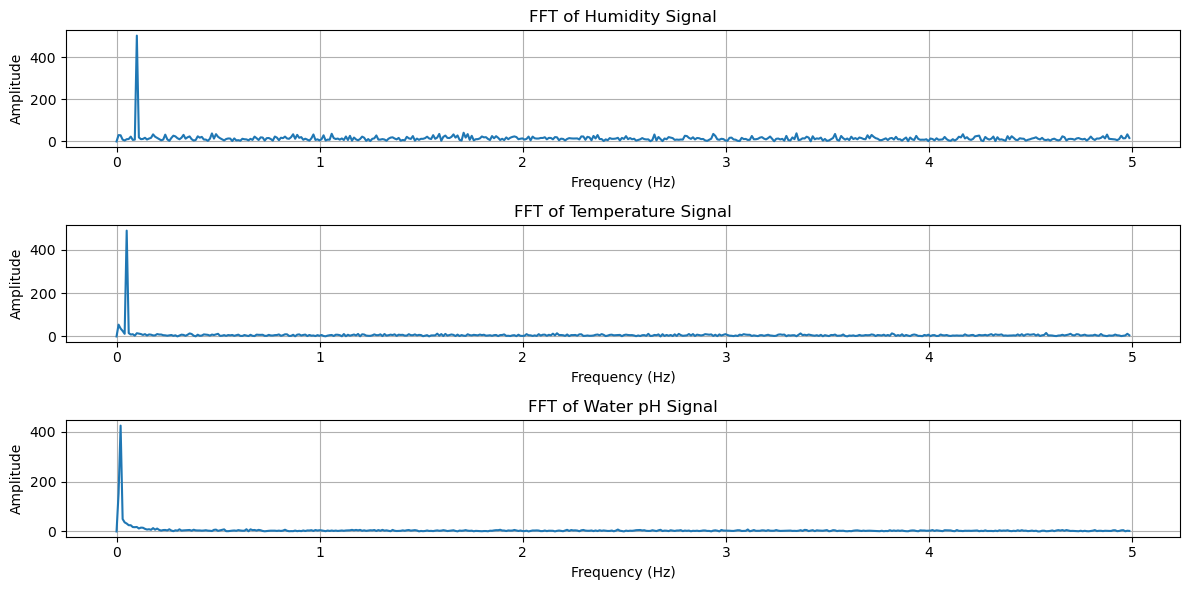

In [69]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

filtered_df = df[df['Date'] == pd.Timestamp('2024-11-17')] #2024/11/17
mean_values = filtered_df[['Temperature(C)', 'Humidity(%)', 'pH']].mean() #average values for temperature, humidity, pH

print(filtered_df)
print("\nDaily Average for 2024-11-17:")
print(mean_values)


time = np.linspace(0, 100, 1000)  # 1000 time points, evenly spaced
Fs = 1 / (time[1] - time[0])  # Sampling frequency (1 Hz here)

# Simulated signals
humidity_signal = np.sin(2 * np.pi * 0.1 * time) + 0.5 * np.random.normal(size=len(time))  # Humidity signal
temperature_signal = np.sin(2 * np.pi * 0.05 * time) + 0.2 * np.random.normal(size=len(time))  # Temperature signal
ph_signal = np.sin(2 * np.pi * 0.02 * time) + 0.1 * np.random.normal(size=len(time))  # Water pH signal

# Step 1: Detrend signals
humidity_signal_detrended = detrend(humidity_signal)
temperature_signal_detrended = detrend(temperature_signal)
ph_signal_detrended = detrend(ph_signal)

# Step 2: Apply FFT to signals
N = len(time)  # Number of samples
frequencies = np.fft.fftfreq(N, d=1/Fs)  # Frequency bins
positive_freqs = frequencies[:N // 2]  # Keep only positive frequencies

# FFT values (magnitude)
humidity_fft = np.abs(np.fft.fft(humidity_signal_detrended)[:N // 2])
temperature_fft = np.abs(np.fft.fft(temperature_signal_detrended)[:N // 2])
ph_fft = np.abs(np.fft.fft(ph_signal_detrended)[:N // 2])

# Step 3: Find dominant frequencies and amplitudes
dominant_freq_humidity = positive_freqs[np.argmax(humidity_fft)]
dominant_amplitude_humidity = np.max(humidity_fft)
print(f"Dominant frequency for humidity: {dominant_freq_humidity:.3f} Hz, Amplitude: {dominant_amplitude_humidity:.3f}")

dominant_freq_temperature = positive_freqs[np.argmax(temperature_fft)]
dominant_amplitude_temperature = np.max(temperature_fft)
print(f"Dominant frequency for temperature: {dominant_freq_temperature:.3f} Hz, Amplitude: {dominant_amplitude_temperature:.3f}")

dominant_freq_ph = positive_freqs[np.argmax(ph_fft)]
dominant_amplitude_ph = np.max(ph_fft)
print(f"Dominant frequency for pH: {dominant_freq_ph:.3f} Hz, Amplitude: {dominant_amplitude_ph:.3f}")

# Step 4: Plot FFTs for visualization
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(positive_freqs, humidity_fft)
plt.title("FFT of Humidity Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(positive_freqs, temperature_fft)
plt.title("FFT of Temperature Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(positive_freqs, ph_fft)
plt.title("FFT of Water pH Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

          Date                Time  Temperature(C)  Humidity(%)    pH
673 2024-11-18 2024-12-16 00:10:00            29.3           87  2.56
674 2024-11-18 2024-12-16 00:10:05            29.3           87  2.56
675 2024-11-18 2024-12-16 00:25:00            29.3           87  2.56
676 2024-11-18 2024-12-16 00:40:02            29.3           87  2.56
677 2024-11-18 2024-12-16 00:40:09            29.3           87  2.56
..         ...                 ...             ...          ...   ...
810 2024-11-18 2024-12-16 23:26:37            29.8           77  2.56
811 2024-11-18 2024-12-16 23:26:39            29.8           77  2.56
812 2024-11-18 2024-12-16 23:41:23            29.6           77  2.56
813 2024-11-18 2024-12-16 23:56:22            29.6           77  2.56
814 2024-11-18 2024-12-16 23:56:27            29.6           77  2.56

[142 rows x 5 columns]

Daily Average for 2024-11-18:
Temperature(C)    30.921831
Humidity(%)       75.049296
pH                 2.560000
dtype: float64
Domina

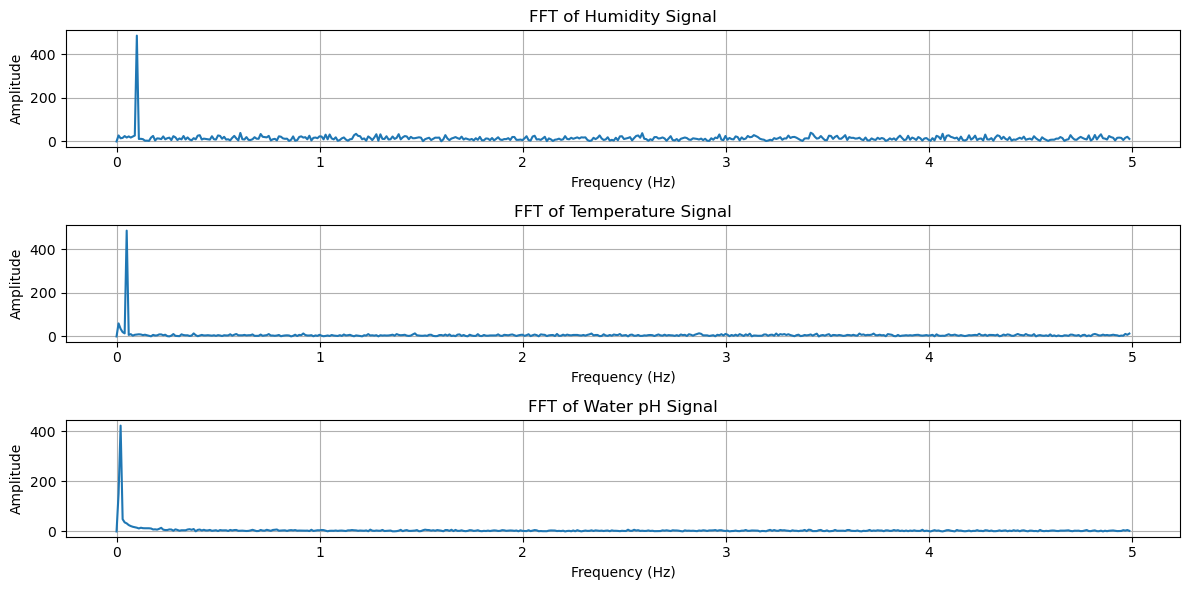

In [67]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

filtered_df = df[df['Date'] == pd.Timestamp('2024-11-18')] #2024/11/18
mean_values = filtered_df[['Temperature(C)', 'Humidity(%)', 'pH']].mean() #average values for temperature, humidity, pH


print(filtered_df)
print("\nDaily Average for 2024-11-18:")
print(mean_values)


time = np.linspace(0, 100, 1000)  # 1000 time points, evenly spaced
Fs = 1 / (time[1] - time[0])  # Sampling frequency (1 Hz here)

# Simulated signals
humidity_signal = np.sin(2 * np.pi * 0.1 * time) + 0.5 * np.random.normal(size=len(time))  # Humidity signal
temperature_signal = np.sin(2 * np.pi * 0.05 * time) + 0.2 * np.random.normal(size=len(time))  # Temperature signal
ph_signal = np.sin(2 * np.pi * 0.02 * time) + 0.1 * np.random.normal(size=len(time))  # Water pH signal

# Step 1: Detrend signals
humidity_signal_detrended = detrend(humidity_signal)
temperature_signal_detrended = detrend(temperature_signal)
ph_signal_detrended = detrend(ph_signal)

# Step 2: Apply FFT to signals
N = len(time)  # Number of samples
frequencies = np.fft.fftfreq(N, d=1/Fs)  # Frequency bins
positive_freqs = frequencies[:N // 2]  # Keep only positive frequencies

# FFT values (magnitude)
humidity_fft = np.abs(np.fft.fft(humidity_signal_detrended)[:N // 2])
temperature_fft = np.abs(np.fft.fft(temperature_signal_detrended)[:N // 2])
ph_fft = np.abs(np.fft.fft(ph_signal_detrended)[:N // 2])

# Step 3: Find dominant frequencies and amplitudes
dominant_freq_humidity = positive_freqs[np.argmax(humidity_fft)]
dominant_amplitude_humidity = np.max(humidity_fft)
print(f"Dominant frequency for humidity: {dominant_freq_humidity:.3f} Hz, Amplitude: {dominant_amplitude_humidity:.3f}")

dominant_freq_temperature = positive_freqs[np.argmax(temperature_fft)]
dominant_amplitude_temperature = np.max(temperature_fft)
print(f"Dominant frequency for temperature: {dominant_freq_temperature:.3f} Hz, Amplitude: {dominant_amplitude_temperature:.3f}")

dominant_freq_ph = positive_freqs[np.argmax(ph_fft)]
dominant_amplitude_ph = np.max(ph_fft)
print(f"Dominant frequency for pH: {dominant_freq_ph:.3f} Hz, Amplitude: {dominant_amplitude_ph:.3f}")

# Step 4: Plot FFTs for visualization
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(positive_freqs, humidity_fft)
plt.title("FFT of Humidity Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(positive_freqs, temperature_fft)
plt.title("FFT of Temperature Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(positive_freqs, ph_fft)
plt.title("FFT of Water pH Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

          Date                Time  Temperature(C)  Humidity(%)    pH
815 2024-11-19 2024-12-16 00:11:22            29.6           77  2.56
816 2024-11-19 2024-12-16 00:26:23            29.6           76  2.56
817 2024-11-19 2024-12-16 00:26:28            29.6           76  2.56
818 2024-11-19 2024-12-16 00:41:22            29.6           76  2.56
819 2024-11-19 2024-12-16 00:56:22            29.8           76  2.56
..         ...                 ...             ...          ...   ...
954 2024-11-19 2024-12-16 23:26:21            29.8           70  2.56
955 2024-11-19 2024-12-16 23:26:26            29.8           70  2.56
956 2024-11-19 2024-12-16 23:41:21            29.7           70  2.56
957 2024-11-19 2024-12-16 23:56:21            29.5           71  2.56
958 2024-11-19 2024-12-16 23:56:25            29.5           71  2.56

[144 rows x 5 columns]

Daily Average for 2024-11-19:
Temperature(C)    31.197222
Humidity(%)       67.486111
pH                 2.560000
dtype: float64
Domina

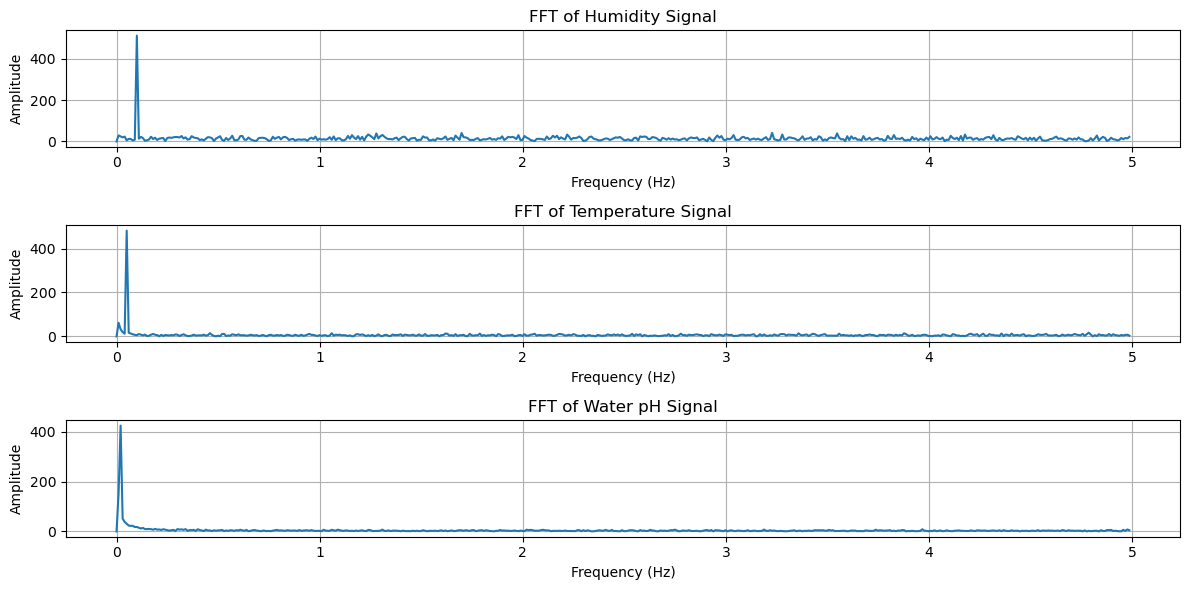

In [65]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

filtered_df = df[df['Date'] == pd.Timestamp('2024-11-19')] #2024/11/19
mean_values = filtered_df[['Temperature(C)', 'Humidity(%)', 'pH']].mean() #average values for temperature, humidity, pH

print(filtered_df)
print("\nDaily Average for 2024-11-19:")
print(mean_values)


time = np.linspace(0, 100, 1000)  # 1000 time points, evenly spaced
Fs = 1 / (time[1] - time[0])  # Sampling frequency (1 Hz here)

# Simulated signals
humidity_signal = np.sin(2 * np.pi * 0.1 * time) + 0.5 * np.random.normal(size=len(time))  # Humidity signal
temperature_signal = np.sin(2 * np.pi * 0.05 * time) + 0.2 * np.random.normal(size=len(time))  # Temperature signal
ph_signal = np.sin(2 * np.pi * 0.02 * time) + 0.1 * np.random.normal(size=len(time))  # Water pH signal

# Step 1: Detrend signals
humidity_signal_detrended = detrend(humidity_signal)
temperature_signal_detrended = detrend(temperature_signal)
ph_signal_detrended = detrend(ph_signal)

# Step 2: Apply FFT to signals
N = len(time)  # Number of samples
frequencies = np.fft.fftfreq(N, d=1/Fs)  # Frequency bins
positive_freqs = frequencies[:N // 2]  # Keep only positive frequencies

# FFT values (magnitude)
humidity_fft = np.abs(np.fft.fft(humidity_signal_detrended)[:N // 2])
temperature_fft = np.abs(np.fft.fft(temperature_signal_detrended)[:N // 2])
ph_fft = np.abs(np.fft.fft(ph_signal_detrended)[:N // 2])

# Step 3: Find dominant frequencies and amplitudes
dominant_freq_humidity = positive_freqs[np.argmax(humidity_fft)]
dominant_amplitude_humidity = np.max(humidity_fft)
print(f"Dominant frequency for humidity: {dominant_freq_humidity:.3f} Hz, Amplitude: {dominant_amplitude_humidity:.3f}")

dominant_freq_temperature = positive_freqs[np.argmax(temperature_fft)]
dominant_amplitude_temperature = np.max(temperature_fft)
print(f"Dominant frequency for temperature: {dominant_freq_temperature:.3f} Hz, Amplitude: {dominant_amplitude_temperature:.3f}")

dominant_freq_ph = positive_freqs[np.argmax(ph_fft)]
dominant_amplitude_ph = np.max(ph_fft)
print(f"Dominant frequency for pH: {dominant_freq_ph:.3f} Hz, Amplitude: {dominant_amplitude_ph:.3f}")

# Step 4: Plot FFTs for visualization
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(positive_freqs, humidity_fft)
plt.title("FFT of Humidity Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(positive_freqs, temperature_fft)
plt.title("FFT of Temperature Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(positive_freqs, ph_fft)
plt.title("FFT of Water pH Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

          Date                Time  Temperature(C)  Humidity(%)    pH
959 2024-11-20 2024-12-16 00:11:21            29.3           72  2.56

Daily Average for 2024-11-20:
Temperature(C)    29.30
Humidity(%)       72.00
pH                 2.56
dtype: float64
Dominant frequency for humidity: 0.100 Hz, Amplitude: 501.896
Dominant frequency for temperature: 0.050 Hz, Amplitude: 481.870
Dominant frequency for pH: 0.020 Hz, Amplitude: 424.952


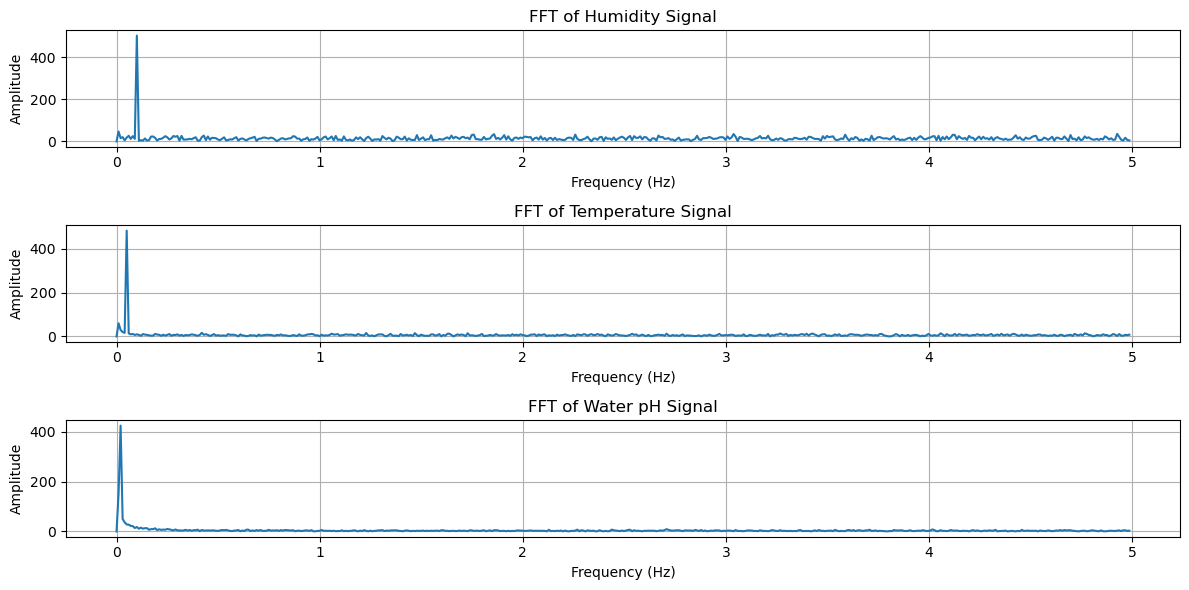

In [63]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

filtered_df = df[df['Date'] == pd.Timestamp('2024-11-20')] #2024/11/20
mean_values = filtered_df[['Temperature(C)', 'Humidity(%)', 'pH']].mean() #average values for temperature, humidity, pH

print(filtered_df)
print("\nDaily Average for 2024-11-20:")
print(mean_values)


time = np.linspace(0, 100, 1000)  # 1000 time points, evenly spaced
Fs = 1 / (time[1] - time[0])  # Sampling frequency (1 Hz here)

# Simulated signals
humidity_signal = np.sin(2 * np.pi * 0.1 * time) + 0.5 * np.random.normal(size=len(time))  # Humidity signal
temperature_signal = np.sin(2 * np.pi * 0.05 * time) + 0.2 * np.random.normal(size=len(time))  # Temperature signal
ph_signal = np.sin(2 * np.pi * 0.02 * time) + 0.1 * np.random.normal(size=len(time))  # Water pH signal

# Step 1: Detrend signals
humidity_signal_detrended = detrend(humidity_signal)
temperature_signal_detrended = detrend(temperature_signal)
ph_signal_detrended = detrend(ph_signal)

# Step 2: Apply FFT to signals
N = len(time)  # Number of samples
frequencies = np.fft.fftfreq(N, d=1/Fs)  # Frequency bins
positive_freqs = frequencies[:N // 2]  # Keep only positive frequencies

# FFT values (magnitude)
humidity_fft = np.abs(np.fft.fft(humidity_signal_detrended)[:N // 2])
temperature_fft = np.abs(np.fft.fft(temperature_signal_detrended)[:N // 2])
ph_fft = np.abs(np.fft.fft(ph_signal_detrended)[:N // 2])

# Step 3: Find dominant frequencies and amplitudes
dominant_freq_humidity = positive_freqs[np.argmax(humidity_fft)]
dominant_amplitude_humidity = np.max(humidity_fft)
print(f"Dominant frequency for humidity: {dominant_freq_humidity:.3f} Hz, Amplitude: {dominant_amplitude_humidity:.3f}")

dominant_freq_temperature = positive_freqs[np.argmax(temperature_fft)]
dominant_amplitude_temperature = np.max(temperature_fft)
print(f"Dominant frequency for temperature: {dominant_freq_temperature:.3f} Hz, Amplitude: {dominant_amplitude_temperature:.3f}")

dominant_freq_ph = positive_freqs[np.argmax(ph_fft)]
dominant_amplitude_ph = np.max(ph_fft)
print(f"Dominant frequency for pH: {dominant_freq_ph:.3f} Hz, Amplitude: {dominant_amplitude_ph:.3f}")

# Step 4: Plot FFTs for visualization
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(positive_freqs, humidity_fft)
plt.title("FFT of Humidity Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(positive_freqs, temperature_fft)
plt.title("FFT of Temperature Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(positive_freqs, ph_fft)
plt.title("FFT of Water pH Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()